<a href="https://colab.research.google.com/github/lautitorraca/7506R-2C2023-GRUPO24/blob/main/TP2/7506R_TP2_GRUPO24_RANDOM_FOREST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    precision_recall_curve,
    roc_curve,
    recall_score,
    f1_score,
    precision_score,
)

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Modelos y métricas
from sklearn import tree
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.metrics import roc_auc_score
from sklearn.neural_network import MLPClassifier
from collections import defaultdict
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

#Download
from google.colab import files


In [ ]:

url_train = '/content/train_limpio.csv'
url_test = '/content/test_limpio.csv'

train = pd.read_csv(url_train)
test = pd.read_csv(url_test)

In [ ]:
print(train.shape)
print(test.shape)

(50000, 4)
(8599, 4)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder


df_train = train.copy()
df_test = test.copy()

X = df_train['review_es_clean']
y = df_train['sentimiento']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Vectorización de los textos
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


In [ ]:
rfc = RandomForestClassifier(max_features='auto',
                             oob_score=True,
                             random_state=2,
                             n_jobs=-1,
                             criterion="entropy",
                             min_samples_leaf=5,
                             min_samples_split=5,
                             n_estimators=50 )

#Entrenamos el modelo
model = rfc.fit(X = X_train_tfidf, y = y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [ ]:
y_predRF = model.predict(X_test_tfidf)

# Decodificar las etiquetas numéricas a categóricas para y_pred
y_pred_labels = label_encoder.inverse_transform(y_predRF)

# Decodificar las etiquetas numéricas a categóricas para y_test
y_test_labels = label_encoder.inverse_transform(y_test)


# Métricas de evaluación

positive_label_index = list(label_encoder.classes_).index('positivo')
f1 = f1_score(y_test, y_predRF, pos_label=positive_label_index)


Text(50.722222222222214, 0.5, 'True')

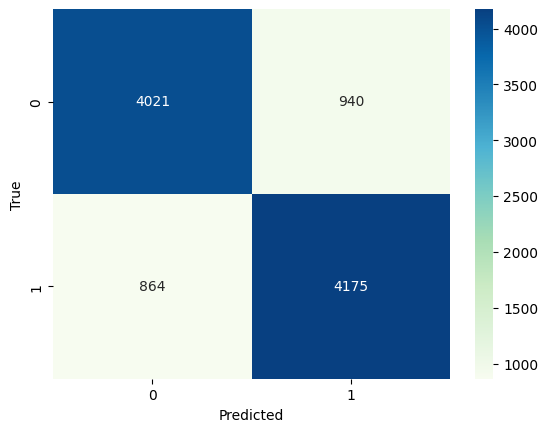

In [ ]:
tabla=confusion_matrix(y_test, y_predRF)

sns.heatmap(tabla,cmap='GnBu',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [ ]:
def mostrar_metricas(y_test, y_pred):
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)

  print(f"Accuracy: {accuracy:.4f}")
  print(f"Precision: {precision:.4f}")
  print(f"Recall: {recall:.4f}")
  print(f"F1 Score: {f1:.4f}")




In [ ]:
mostrar_metricas(y_test, y_predRF)

Accuracy: 0.8196
Precision: 0.8162
Recall: 0.8285
F1 Score: 0.8223


In [ ]:
# test['review_es_clean'] = test['review_es_clean'].astype('category')

# test_features = tfidf_vectorizer.transform(test['review_es_clean'])

# test_predictionsRF = model.predict(test_features)

# output = pd.DataFrame(zip(test["ID"], label_encoder.inverse_transform(test_predictionsRF)),columns = ['ID','sentimiento'])

# output.to_csv('prediccion_RF.csv', index=False)

# # Descargar el archivo de predicciones (esto funcionará en entornos como Jupyter o Google Colab)
# try:
#     from google.colab import files
#     files.download('prediccion_RF.csv')
# except ImportError:
#     print("La función de descarga solo funciona en entornos como Google Colab.")

RANDOM FOREST OPTIMIZADO

In [ ]:
rf_cv = RandomForestClassifier(max_features='auto', oob_score=True, random_state=1, n_jobs=-1)

param_grid = { "criterion" : ["gini"],
               "min_samples_leaf" : [ 5, 10],
               "min_samples_split" :  [10, 12, 16],
               "n_estimators": [10,20] }

gs = RandomizedSearchCV(estimator=rf_cv, param_distributions=param_grid, scoring="f1", cv=5, n_jobs=-1)
gs_fit = gs.fit(X = X_train_tfidf, y = y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


In [ ]:
gs_fit.best_params_

#El mejor resultado
# {'n_estimators': 20,
#  'min_samples_split': 16,
#  'min_samples_leaf': 5,
#  'criterion': 'gini'}

{'n_estimators': 20,
 'min_samples_split': 16,
 'min_samples_leaf': 5,
 'criterion': 'gini'}

In [ ]:
print("F1 en entrenamiento con cv: "+str(gs_fit.best_score_))

F1 en entrenamiento con cv: 0.77277039765943


In [ ]:
# rf_cv_best=gs_fit.best_estimator_

# y_pred_rf_cv_best = rf_cv_best.predict(X_train_tfidf)

rfc2 = RandomForestClassifier(max_features='auto',
                             oob_score=True,
                             random_state=2,
                             n_jobs=-1,
                             criterion="gini",
                             min_samples_leaf=16,
                             min_samples_split=5,
                             n_estimators=20 )

#Entrenamos el modelo
rf_cv_best = rfc2.fit(X = X_train_tfidf, y = y_train)

y_pred_rf_cv_best = rf_cv_best.predict(X_test_tfidf)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


              precision    recall  f1-score   support

           0       0.80      0.80      0.80      4961
           1       0.80      0.81      0.81      5039

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.80      0.80      0.80     10000



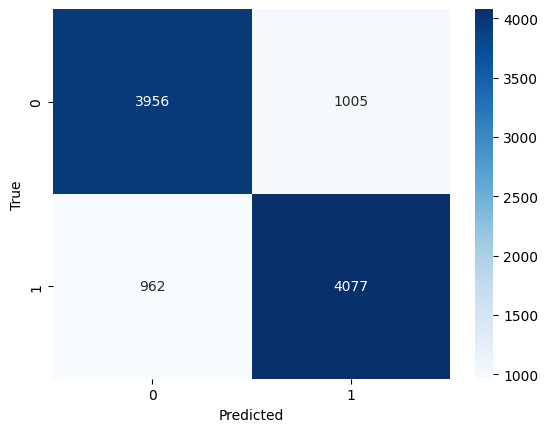

In [ ]:
tabla=confusion_matrix(y_test, y_pred_rf_cv_best)

sns.heatmap(tabla, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

print(classification_report(y_test,y_pred_rf_cv_best))

In [ ]:
mostrar_metricas(y_test, y_pred_rf_cv_best)

Accuracy: 0.8033
Precision: 0.8022
Recall: 0.8091
F1 Score: 0.8057


In [ ]:
test['review_es_clean'] = test['review_es_clean'].astype('category')

test_features_2 = tfidf_vectorizer.transform(test['review_es_clean'])

test_predictionsRF_Optimized = rf_cv_best.predict(test_features_2)

output = pd.DataFrame(zip(test["ID"], label_encoder.inverse_transform(test_predictionsRF_Optimized)),columns = ['ID','sentimiento'])

output.to_csv('predictionsRF_Optimized.csv', index=False)

# Descargar el archivo de predicciones (esto funcionará en entornos como Jupyter o Google Colab)
try:
    from google.colab import files
    files.download('predictionsRF_Optimized.csv')
except ImportError:
    print("La función de descarga solo funciona en entornos como Google Colab.")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>